In [1]:
import numpy as np
a = np.array([0,1])

In [2]:
repr(a)

'array([0, 1])'

In [4]:
arr = np.array([np.nan, 2, 3, 4, 5])
arr2 = arr.copy()
arr2[0] = 10

In [13]:
arr = np.arange(24)

arr = np.reshape(arr, (3, 4, 2))
print(arr)
arr.flatten()

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [21]:
matrix = np.arange(9) + 1
matrix = matrix.reshape((3,3))

In [23]:
np.random.shuffle(matrix)

In [26]:
np_filter = np.array([[True, False],[False,True]])
positive = np.array([[1,2],[3,4]])
negative = np.array([[-2,-5],[-1,-8]])

np.where(np_filter, positive, negative)

array([[ 1, -5],
       [-1,  4]])

In [27]:
arr = np.array([[-2, -1, -3],
[4, 5, -6],
[3, 9, 1]])

In [31]:
np.any(arr >0, axis=1)

array([False,  True,  True])

In [38]:
arr[np.where(np.any(arr==5, axis=1))]

array([[ 4,  5, -6]])

# Data Preprocessing

In [39]:
import pandas as pd

In [42]:
df = pd.DataFrame([[5,6],[1.2,3]])
ser = pd.Series([0,0],name='r3')

df_app = df.append(ser)
print(df_app)
df_app = df.append(ser, ignore_index=True)
print(df_app)

df2 = pd.DataFrame([[0,0],[9,9]])
df_app = df.append(df2)
print(df_app)

      0  1
0   5.0  6
1   1.2  3
r3  0.0  0
     0  1
0  5.0  6
1  1.2  3
2  0.0  0
     0  1
0  5.0  6
1  1.2  3
0  0.0  0
1  9.0  9


In [50]:
df = pd.DataFrame({'c1': [1,2], 'c2': [3,4], 'c3': [5,6]}, index=['r1', 'r2'])

In [55]:
print(df.drop(labels=['c1', 'c3'], axis=1))
print(df.drop(index='r2'))
print(df.drop(index='r2', columns='c2'))

    c2
r1   3
r2   4
    c1  c2  c3
r1   1   3   5
    c1  c3
r1   1   5


In [62]:
df1 = pd.DataFrame({'c1':[1,2], 'c2':[3,4]},
index=['r1','r2'])
df2 = pd.DataFrame({'c1':[5,6], 'c2':[7,8]},
index=['r1','r2'])
df3 = pd.DataFrame({'c1':[5,6], 'c2':[7,8]})

print(pd.concat([df1, df2], axis=1))
print(pd.concat([df2, df1, df3]))

    c1  c2  c1  c2
r1   1   3   5   7
r2   2   4   6   8
    c1  c2
r1   5   7
r2   6   8
r1   1   3
r2   2   4
0    5   7
1    6   8


In [63]:
mlb_df1 = pd.DataFrame({'name': ['john doe', 'al smith', 'sam black', 'john doe'],
'pos': ['1B', 'C', 'P', '2B'],
'year': [2000, 2004, 2008, 2003]})
mlb_df2 = pd.DataFrame({'name': ['john doe', 'al smith', 'jack lee'],
'year': [2000, 2004, 2012],
'rbi': [80, 100, 12]})

In [64]:
pd.merge(mlb_df1, mlb_df2)

,name,pos,year,rbi
0,john doe,1B,2000,80
1,al smith,C,2004,100


In [68]:
stats_df = pd.read_csv('baseballdatabank-master/core/Salaries.csv')

In [83]:
groups = stats_df.groupby('yearID')
for name, group in groups:
    # print('Year: {}'.format(name))
    # print('{}\n'.format(group))
    pass
# print(groups.get_group(2016))
# print(groups.sum())
# print(groups.mean())

no2015 = groups.filter(lambda x: x.name > 2014)

In [86]:
groups = stats_df.groupby(['yearID', 'teamID'])
print(groups.sum())

                  salary
yearID teamID           
1985   ATL      14807000
       BAL      11560712
       BOS      10897560
       CAL      14427894
       CHA       9846178
...                  ...
2016   SLN     143053500
       TBA      57097310
       TEX     176038723
       TOR     138701700
       WAS     141652646

[918 rows x 1 columns]


In [88]:
stats_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [90]:
df = pd.DataFrame({
'T1': [10, 15, 8],
'T2': [25, 27, 25],
'T3': [16, 15, 10]})
print(df.sum())

T1    33
T2    77
T3    41
dtype: int64


In [92]:
df = pd.DataFrame({
'T1': [0.1, 150.],
'T2': [0.25, 240.],
'T3': [0.16, 100.]})

df_ms = df.multiply([1000, 1], axis=0)

In [93]:
df_ms

,T1,T2,T3
0,100.0,250.0,160.0
1,150.0,240.0,100.0


In [96]:
mlb_df = pd.read_csv('baseballdatabank-master/core/Batting.csv')

In [97]:
def col_list_sum(df, col_list, weights=None):
    col_df = df[col_list]
    if weights is not None:
        col_df = col_df.multiply(weights)
    return col_df.sum(axis=1)

In [101]:
mlb_df['BA'] = mlb_df['H'] / mlb_df['AB']
mlb_df['1B'] = mlb_df['H'] - (mlb_df['2B'] + mlb_df['3B'] + mlb_df['HR'])

In [103]:
weighted_hits = col_list_sum(mlb_df, ['1B', '2B', '3B', 'HR'], [1, 2, 3, 4])

In [106]:
mlb_df[['RBI', 'AB', 'HR']].describe()

,RBI,AB,HR
count,108033.000000,108789.000000,108789.000000
mean,16.790388,139.241320,2.850150
std,26.225046,183.602089,6.368678
min,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000
50%,3.000000,46.000000,0.000000
75%,24.000000,224.000000,2.000000
max,191.000000,716.000000,73.000000


In [113]:
mlb_df.values

array([['abercda01', 1871, 1, ..., 0.0, 0.0, 0],
       ['addybo01', 1871, 1, ..., 0.0, 0.2711864406779661, 26],
       ['allisar01', 1871, 1, ..., 1.0, 0.291970802919708, 31],
       ...,
       ['zimmeky01', 2020, 1, ..., 0.0, nan, 0],
       ['zuberty01', 2020, 1, ..., 0.0, nan, 0],
       ['zuninmi01', 2020, 1, ..., 0.0, 0.14666666666666667, 3]],
      dtype=object)

In [111]:
pd.get_dummies(mlb_df)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,teamID_WS7,teamID_WS8,teamID_WS9,teamID_WSU,lgID_AA,lgID_AL,lgID_FL,lgID_NL,lgID_PL,lgID_UA
0,1871,1,1,4,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1871,1,25,118,30,32,6,0,0,13.0,...,0,0,0,0,0,0,0,0,0,0
2,1871,1,29,137,28,40,4,5,0,19.0,...,0,0,0,0,0,0,0,0,0,0
3,1871,1,27,133,28,44,10,2,2,27.0,...,0,0,0,0,0,0,0,0,0,0
4,1871,1,25,120,29,39,11,3,0,16.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,2020,1,2,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
108785,2020,1,3,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
108786,2020,1,16,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
108787,2020,1,23,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [115]:
from sklearn.preprocessing import scale

scale(mlb_df[['AB', '1B', '2B', '3B', 'HR']])

In [118]:
from sklearn.preprocessing import Normalizer

Normalizer().fit_transform(mlb_df[['AB', '1B', '2B', '3B', 'HR']])

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.97537317, 0.21491273, 0.04959525, 0.        , 0.        ],
       [0.97433039, 0.22046892, 0.0284476 , 0.0355595 , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99637536, 0.03985501, 0.05314002, 0.        , 0.05314002]])

In [119]:
mlb_df.is_nan

AttributeError: 'DataFrame' object has no attribute 'is_nan'

In [120]:
pd.is_nan

AttributeError: module 'pandas' has no attribute 'is_nan'

In [127]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

malignant = bc.data[bc.target == 0]
benign = bc.data[bc.target == 1]

In [129]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [134]:
labels = bc.target
label_names = bc.target_names
data = bc.data

In [132]:
from sklearn.decomposition import PCA

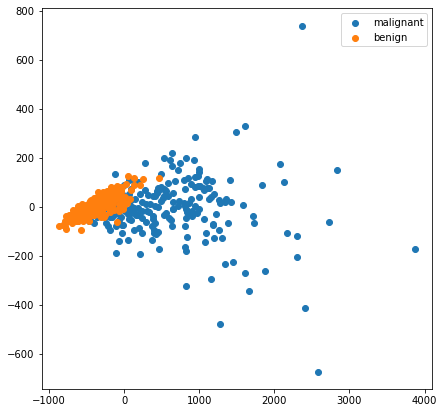

In [147]:
def get_label_info(component_data, labels, class_label, label_names):
    label_name = label_names[class_label]
    label_data = component_data[labels == class_label]
    return label_name, label_data

component_data = PCA(2).fit_transform(data)

separated_data = []
plt.figure(figsize=(7,7))
for class_label in range(len(label_names)):
    sep_data = get_label_info(component_data, labels, class_label, label_names) 
    # separated_data.append( )
    
    plt.scatter(sep_data[1].T[0], sep_data[1].T[1], label=label_names[class_label])
    
plt.legend()

# Data Modeling

In [148]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

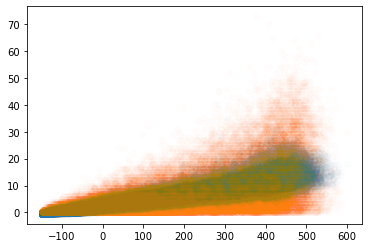

In [179]:

sub_df = mlb_df[['G', 'AB', 'R', 'BB']]
y = mlb_df[['HR']]
reg.fit(sub_df, y)
pred_y = reg.predict(np.array(sub_df))
pca = PCA(1).fit_transform(sub_df)

plt.scatter(pca, pred_y, alpha=0.01)
plt.scatter(pca, y, alpha=0.01)

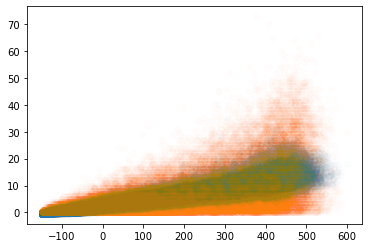

In [181]:
alphas = [0.1, 0.2, 0.3]
reg = linear_model.RidgeCV(alphas=alphas)

sub_df = mlb_df[['G', 'AB', 'R', 'BB']]
y = mlb_df[['HR']]
reg.fit(sub_df, y)
pred_y = reg.predict(np.array(sub_df))
pca = PCA(1).fit_transform(sub_df)

plt.scatter(pca, pred_y, alpha=0.01)
plt.scatter(pca, y, alpha=0.01)

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(sub_df, labels)

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)

DecisionTreeClassifier()

In [202]:
pred_y = clf.predict(test_x)

In [211]:
cross_val_score(clf, sub_df, labels)

array([0.72171155, 0.791479  , 0.84111591, 0.86340656, 0.86487108])

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

def cv_decision_tree(is_clf, data, labels, max_depth, cv):
    if is_clf:
        d_tree = DecisionTreeClassifier(max_depth=max_depth)
    else:
        d_tree = DecisionTreeRegressor(max_depth=max_depth)
        
    scores = cross_val_score(d_tree, data, labels, cv=cv)
    return scores
        
is_clf = False
for depth in range(3, 8):
    # scores = cv_decision_tree(is_clf, sub_df, labels, depth, 5)
    scores = cv_decision_tree(is_clf, sub_df, y, depth, 5)
    mean = scores.mean()
    std_2 = 2 * scores.std()
    print('95% C.I. for depth {}: {} +/- {:.2f}\n'.format(depth, mean, std_2))

95% C.I. for depth 3: -0.37661777197345514 +/- 3.89

95% C.I. for depth 4: -0.3442370121766863 +/- 3.83

95% C.I. for depth 5: -0.34061636306955323 +/- 3.87

95% C.I. for depth 6: -0.32973568368739903 +/- 3.85

95% C.I. for depth 7: -0.2956612854590501 +/- 3.74

